In [306]:
#呼叫所需套件
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
from scipy import stats


In [307]:
type = ['Semi-Conductor 202211', 'Finance 202211', 'Shipping  202211']
path = os.getcwd() + '\\data\\total\\'
print(path)

# loop over the list of xlsx files
# 0 = Semi-Conductor, 1 = Finance, 2 = Shipping
# sample_data = glob.glob(os.path.join(path, "*.xlsx"))
# print("sample_data: ",sample_data)
# for f in sample_data:
#   df = pd.read_xlsx(f)


c:\Users\User\Documents\#tmp\python-\python-webstorm-TEJ-Banking-and-Finance\data\total\


In [308]:
# 呼叫xlsx檔
timeType = ['分','日','周', '月', '年']
stock_list = ["2603", "2607", "2608","2609", "2610", "2612", "2642", "5607"]
unit = "minute"
file_list=[]
for idx in range(len(stock_list)):
    file_list.append(stock_list[idx]+timeType[0]+".xlsx")
    # file_list = ["2609"+timeType[1]+ ".xlsx", "2610"+timeType[1]+".xlsx", "2612"+timeType[1]+".xlsx", "Y9999"+timeType[1]+".xlsx"]
data = [pd.read_excel(os.path.join(path, xlsx_filename)) for xlsx_filename in file_list]

In [309]:
#get Return from 收盤價
column_name = "收盤價"
for i in data:
  i['RETURN']=np.log(i.loc[:, column_name]) - np.log(i.loc[:, column_name].shift(1))

In [323]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])
result = []
result_description =  []

for idx in range(len(data)):
  # for minute and half minute
  # result.append(pd.DataFrame(data[idx].loc[:, 'RETURN'].groupby(data[idx].index // 4).mean(),columns=['RETURN']))
  
  # for normal data
  result.append(pd.DataFrame(data[idx], columns=['RETURN']))
  
  result_description.append(result[idx].apply(descriptive_statistics))

result = pd.concat(result, axis = 1)
result_description = pd.concat(result_description, axis = 1)

result.columns =  stock_list
result_description.columns = stock_list
result.to_excel("./result/"+unit +"/" +"minute_return.xlsx")
result_description.to_excel("./result/"+unit +"/" +"minute_description.xlsx")
result

,2603,2607,2608,2609,2610,2612,2642,5607
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.007299,0.005764,0.00000,0.001660,0.002954,0.000000,0.001163,0.000000
2,-0.003643,0.000000,0.00000,0.000000,-0.002954,0.000000,0.009259,-0.001944
3,0.000000,-0.001918,0.00000,0.001657,-0.002963,0.001566,-0.001153,0.000000
4,0.000000,0.000000,0.00000,-0.001657,0.000000,0.000000,-0.003466,0.000000
...,...,...,...,...,...,...,...,...
5935,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5936,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5937,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5938,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


# Descriptive Statistics

In [311]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [322]:
#第一種直方圖 #單一圖形

# len(data)

for idx in range(len(data)):
  # plt.hist(data[idx].RETURN, bins= 100)
  # tmp = pd.DataFrame(data[idx].loc[:, 'RETURN'].groupby(data[idx].index // 4).mean())
  sns.histplot(data[idx].RETURN, kde=True, bins= 100)
  # sns.clf()
  # # plt.xticks(np.arange(-0.01, 0.01, 0.002))
  xvalue = 0.005
  plt.xlim(-xvalue,xvalue)
  plt.ylim(0,6000)
  # plt.yscale("log")
  plt.title(stock_list[idx] + unit)
  plt.xlabel("Return")
  plt.ylabel("Frequency")
  plt.savefig("./result/"+unit +"/" + stock_list[idx]+ unit +".png")
  # plt.show()
  plt.clf()
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

<Figure size 640x480 with 0 Axes>

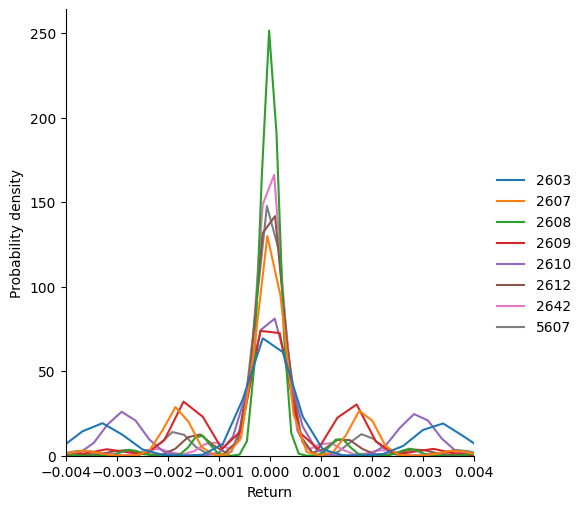

In [321]:
# 第三種直方圖
# colorType = ['red','darkorange', 'g', 'dodgerblue']
# for idx in range(len(data)):
#   # plt.hist(data[idx].RETURN, bins=100, density=True, label=list[idx],color = colorType[idx])
#   # plt.xlim(-0.0075,0.0075)
#   plt.plot(data[idx].RETURN, label=list[idx],color = colorType[idx])
ax = sns.displot(result, kind="kde", fill=False)
ax.set(xlabel='Return', ylabel='Probability density')

xvalue = 0.004
plt.xlim(-xvalue, xvalue)
# plt.title("Return")
plt.savefig("./result/"+unit + "/" + unit + ".png")
